# TASK 3

## Task 3.B

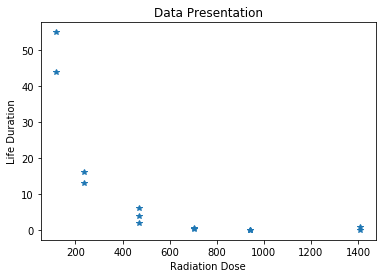

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Read csv
df = pd.read_csv("C:/Users/John/Downloads/survival.csv")

plt.title('Data Presentation')
plt.xlabel('Radiation Dose')
plt.ylabel('Life Duration')
plt.plot(df.dose,df.surv,'*')
plt.show()

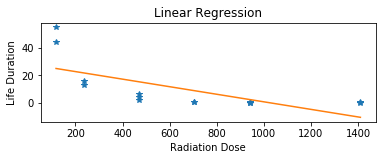

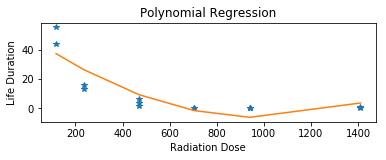

In [2]:
##Linear Regression

#Needed libraries
from sklearn import linear_model

#Specify regression method and fit data
reg = linear_model.LinearRegression()
reg.fit(df.dose.as_matrix().reshape(-1, 1), df.surv.as_matrix().reshape(-1, 1))

#Build linear model, given coefficient and intercept
reg_model = df.dose.as_matrix() * reg.coef_ + reg.intercept_

##Polynomial Regression

#Needed libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

#Specify regression method and fit data
model = Pipeline([('poly', PolynomialFeatures(degree=2)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(df.dose.as_matrix().reshape(-1, 1), df.surv.as_matrix().reshape(-1, 1))

#Build polynomial model, given coefficient and intercept
reg_model1 = model.named_steps['linear'].coef_[0,0] + model.named_steps['linear'].coef_[0,1] * df.dose.as_matrix().reshape(-1, 1) + model.named_steps['linear'].coef_[0,2] * pow(df.dose.as_matrix().reshape(-1, 1),2)

#Plot each model
plt.figure()

plt.subplot(211)
plt.xlabel('Radiation Dose')
plt.ylabel('Life Duration')
plt.title('Linear Regression')
plt.plot(df.dose,df.surv,'*',df.dose.as_matrix(),reg_model.reshape(-1, 1))
plt.show()

plt.subplot(212)
plt.xlabel('Radiation Dose')
plt.ylabel('Life Duration')
plt.title('Polynomial Regression')
plt.plot(df.dose,df.surv,'*',df.dose.as_matrix(),reg_model1.reshape(-1, 1))
plt.show()

In [3]:
#Needed library
from sklearn.metrics import mean_absolute_error, mean_squared_error

#Linear Regression
print('Linear Regression')
print("MAE = ", mean_absolute_error(df.surv.as_matrix(), (df.dose.as_matrix() * reg.coef_ + reg.intercept_).reshape(-1,1)))
print("MSE = ", mean_squared_error(df.surv.as_matrix(), (df.dose.as_matrix() * reg.coef_ + reg.intercept_).reshape(-1,1)))

#Multinomial Regression
print('\nPolynomial Regression')
print("MAE = ", mean_absolute_error(df.surv.as_matrix(), (model.named_steps['linear'].coef_[0,0] + model.named_steps['linear'].coef_[0,1] * df.dose.as_matrix().reshape(-1, 1) + model.named_steps['linear'].coef_[0,2] * pow(df.dose.as_matrix().reshape(-1, 1),2)).reshape(-1,1)))
print("MSE = ", mean_squared_error(df.surv.as_matrix(), (model.named_steps['linear'].coef_[0,0] + model.named_steps['linear'].coef_[0,1] * df.dose.as_matrix().reshape(-1, 1) + model.named_steps['linear'].coef_[0,2] * pow(df.dose.as_matrix().reshape(-1, 1),2)).reshape(-1,1)))

Linear Regression
MAE =  10.1817128897
MSE =  154.116948688

Polynomial Regression
MAE =  6.62453257755
MSE =  62.8383773873


## Task 3.C

In [4]:
#Needed library
from string import digits

#Read csv
df = pd.read_csv("C:/Users/John/Dropbox/SmsCollection.csv", delimiter='\n', header=0, engine="python")

#Csv to string
texts = df.to_csv()

#Main idea: For each row found in the string, have two pointers - the first one at the beggining and the second one
#at the end of the row. Move the first one along the row, until we've found our fist comma - the characters that the pointer
#have passed represent the number of the message in the dataset. We move the pointer even further, until we've found our first
#semicolon - these caracters represent whether this message is spam or not. The rest of the characters of the row correspond to 
#the original message.

#List that contains the number of the message, whether it's spam or not and the original text. Each one of those lists 
#represents a column in the dataframe.
num = []
label = []
text = []

#Initialize first pointer
startpoint = 0

#Search the entirety of the string
for i in range(0,len(texts)-1):
    
    #Row found
    if texts[i] == '\n':
        
        #temp is the substring which will contain the number and the label later on
        firstComma = False
        firstSemi = False
        temp = ""
        
        #Run along the two pointers
        for ind in range(startpoint,i):
            
            #Keep the chars that we've passed
            temp += texts[ind]
            
            if texts[ind] == ',' and firstComma == False:
                #Number found. We don't append the entirety of temp in order to throw away commas etc - we just want the number
                num.append(temp[1:-1])
                temp = ""
                firstComma = True
            elif texts[ind] == ';' and firstSemi == False:
                #Label found. We just want the label, thus some values that contain double quotes are cleared. The rest
                #of the row is considered as the original SMS message
                if temp[0] == "\"":
                    label.append(temp[1:-1])
                    temp = ""
                    firstSemi = True
                    text.append(texts[ind+1:i])
                    break
                else:
                    label.append(temp[:-1])
                    temp = ""
                    firstSemi = True
                    text.append(texts[ind+1:i])
                    break
        
        #Renew the position first pointer
        startpoint = i

#Partial data cleaning

#Lower case
text = [x.lower() for x in text]

#Remove digits
remove_digits = str.maketrans('', '', digits)
text = [x.translate(remove_digits) for x in text]

In [5]:
#Needed libraries and train dataset
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text, label, test_size=0.2)

#Build model that delets stopwords, finds the frequency of each other word and is based on Naive Bayes
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

#Calculate performance
predicted = text_clf.predict(X_test)
print(np.mean(predicted == y_test))

#Build model as before, with the difference of Supprot Vector Machines instead of Naive Bayes
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42))])
text_clf_svm = text_clf_svm.fit(X_train, y_train)

#Calculate its new performance
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

C:\Users\John\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.972197309417


C:\Users\John\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


0.96860986547085204